# Calculadora Estatística 
###### v: 4.0
Programa desenvolvido para utilização na analíse de dados dentro do Laboratório de Física I e para introdução a linguagem de programação, podendo ter outras utilidades.<br>
 **Autor**: Carlos Augusto  Rodrigues de Oliveira <br>**Orientadoras:** Mariana Pojar & Eliane de Fátima Chinaglia
 ## Contato

Caso queira enviar sugestões ou reportar algum problema entre em contato em: 

* Email: uniecaoliveira@fei.edu.br
* Redes sociais:  
    - __[Twitter](https://twitter.com/gustc_carlos)__
    - __[Instagram](https://twitter.com/gustc_carlos)__
    
## Instruções
Algumas instruções para utilizar o programa corretamente: 
1. Para utilizar as linhas de codigo selecione-a e utilize o comando "run" no canto superior da sua pagina ou pressionando a tecla f5 
2. Lembre-se sempre de deixar o arquivo de dados junto com o arquivo do programa

# COMEÇANDO... 
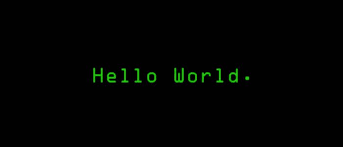" 
##  Importando as bibliotecas utilizadas
Para otimizar o código utilizamos bibliotecas externas com funcionalides diversas, para consulta-las acesse: 
- statistics: https://docs.python.org/3.9/library/statistics.html
- Pandas: https://pandas.pydata.org/
- Numpy https://numpy.org/

In [1]:
import numpy as np
import statistics as st
import pandas as pd

## Criando as funções
Neste momento vamos trabalhar com o funcionamento do programa.

### Leitura do arquivo de dados
Caso queira analisar um arquivo de dados é necessário utilizar essa função. <br>Para isso lembre-se de deixar seu arquivo na mesma pasta do programa e insira o nome do arquivo (indicando a extensão) entre aspas no campo indicado. 

In [2]:
def read():
    valores = []
    arquivo_de_dados = pd.read_csv('aceleração_QuedaLivre.csv', sep=';') #colocar o endereço do seu arquivo aqui
    for y in arquivo_de_dados:
        try:
            y = str(y).replace(',', '.')
            float(y)
        except:
            print()
        else:
            valores.append(float(y))
        for x in arquivo_de_dados[y]:
            try:
                x = str(x).replace(',', '.')
                float(x)
            except:
                print('O dado a seguir estava no seu arquivo de dados e foi ignorado por não ser um valor: ')
                print(x, ' = ', type(x))
                print('-' * 30)
            else:
                valores.append(float(x))
    return valores
dados = read()
dados


O dado a seguir estava no seu arquivo de dados e foi ignorado por não ser um valor: 
a  =  <class 'str'>
------------------------------


[7.112926825,
 7.775837425,
 13.40733748,
 7.861622386,
 10.94952799,
 13.66702393,
 8.934669739,
 7.765315955,
 12.51392249,
 19.41998518,
 12.07234059,
 9.465408064,
 11.92808836,
 9.746934976,
 8.892716307,
 9.701006254,
 10.81614742,
 15.40393194,
 11.55944117,
 11.936721,
 14.43275027,
 15.63342776,
 12.37482834,
 8.009704111,
 6.465852016,
 10.7747578,
 10.81735355,
 15.58462419,
 12.00896607,
 13.72468543,
 10.58184905,
 12.72827473,
 10.26491758,
 6.952895634,
 7.942183653,
 10.97545939,
 11.86265774,
 10.34744885,
 27.9262602,
 11.43449947,
 20.1753163,
 20.72267747,
 28.17071167,
 9.900811826,
 11.39358558,
 15.56644939,
 10.14623384,
 11.70926671,
 11.58016736,
 13.75953163,
 13.47413532,
 12.13636868,
 11.32062508,
 12.07366283,
 11.7763267,
 10.54060712,
 11.98731509,
 12.67495883,
 9.823829033,
 8.044953566,
 12.29783355,
 11.70493942,
 18.39615374,
 15.65105731,
 5.304171995]

### Analise preliminar
Nesta primeirta etapa vamos obter dados basicos do seu arquivo de dados. É importante que confira as informações referentes aos seus dados para não ocarrer interpretações equivocadas!

In [3]:
print(f'Número de elementos: {len(dados)}\nMaior valor: {max(dados)}\nMenor valor: {min(dados)}')

Número de elementos: 65
Maior valor: 28.17071167
Menor valor: 5.304171995


### Média aritmética $ \overline{x} $
### $$ \overline{x} = \frac{\sum_{i=1}^{n}x_{i}}{n} \\ $$
Estima a centralidade do nosso conjunto de dados, podendo representar uma boa estimativa entre o conjunto de valores que nem sempre é confiável.

In [7]:
media = round(st.mean(dados),2) #Escolha o número de casas decimais exibidas aqui
print(f'Média aritmética simples: {media}')

Média aritmética simples: 12.19


### Desvio Padrão $ \sigma $ 
### $$ \sigma = \sqrt{\frac{\Sigma (x_{i}-\overline{x})^2}{n-1}}  $$
Expressa a dispersão dos conjunto de dados, ou seja, a partir do **desvio padrão** é possivel avaliar a confiança do seu aquivo de dados. Quanto maior o desvio, menor é a confiança no conjunto de dados. 

In [8]:
desvio = round(st.stdev(dados),3) #Escolha o número de casas decimais exibidas aqui
print(f'Desvio Padrão: {desvio}')

Desvio Padrão: 4.199


### Incerteza estatistica ou Desvio padrão da média $ \sigma_{e} $
### $$ \sigma_{e} = \frac{\sigma}{\sqrt{n}} $$
Utilizado para avaliar a propragação dos erros nas medidas. 

In [9]:
IE = st.stdev(dados) / (len(dados) ** (1 / 2))
IEA = round(IE,2) #Escolha o número de casas decimais exibidas aqui
print(f'Incerteza estatística: {IEA}')

Incerteza estatística: 0.52


### Incerteza Residual $ \sigma_{r} $
### $$ \sigma_{r} = \frac{resolução}{2} $$
**Resoulução**: Menor divisão que um instrumento pode representar.<br>
A _Incerteza Residual_ avalia os erros em relação ao instrumento utilizado. 
**Caso não possua resolução insira 0(zero). 
### Incerteza Padrão ou Desvio final da média
### $$ \sigma_{p} = \sqrt{\sigma_{e}^2 + \sigma_{r}^2} $$
Obtido propagando as incertezas. 

In [4]:
r = float(input('Resolução do instrumento: '))
IE = st.stdev(dados) / (len(dados) ** (1 / 2))
IP = (IE ** 2 + (r/2) ** 2) ** (1 / 2)
IPA = round(IP,2) #Escolha o número de casas decimais exibidas aqui
print(f'Incerteza Padrão: {IPA}')

Resolução do instrumento: 0
Incerteza Padrão: 0.52
